In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir(r"..\datasets")

In [3]:
drop_columns = ['geoId', 'countryterritoryCode', 'day', 'month', 'year']

In [4]:
target_country = "China"

In [5]:
# Import and format dataframe
covid19_df = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-31.csv', engine='python')

In [6]:
covid19_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
1,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
2,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
3,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
4,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [7]:
covid19_df['dateRep'] = pd.to_datetime(covid19_df['dateRep'], dayfirst=True)
covid19_df.drop(columns=drop_columns, inplace=True)
covid19_df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
0,2020-03-31,27,0,Afghanistan,37172386.0
1,2020-03-30,8,1,Afghanistan,37172386.0
2,2020-03-29,15,1,Afghanistan,37172386.0
3,2020-03-28,16,1,Afghanistan,37172386.0
4,2020-03-27,0,0,Afghanistan,37172386.0


In [8]:
# Create df for one country
country_df = covid19_df.loc[covid19_df.countriesAndTerritories == "China"].copy()
country_df.sort_values(by=['dateRep'], ascending=True, inplace=True)
country_df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
1609,2019-12-31,27,0,China,1.392730e+09
1608,2020-01-01,0,0,China,1.392730e+09
1607,2020-01-02,0,0,China,1.392730e+09
1606,2020-01-03,17,0,China,1.392730e+09
1605,2020-01-04,0,0,China,1.392730e+09


In [9]:
# Add cumulative columns for cases and deaths
country_df['Cum Cases'] = country_df['cases'].cumsum()
country_df['Cum Deaths'] = country_df['deaths'].cumsum()
country_df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018,Cum Cases,Cum Deaths
1609,2019-12-31,27,0,China,1.392730e+09,27,0
1608,2020-01-01,0,0,China,1.392730e+09,27,0
1607,2020-01-02,0,0,China,1.392730e+09,27,0
1606,2020-01-03,17,0,China,1.392730e+09,44,0
1605,2020-01-04,0,0,China,1.392730e+09,44,0


In [15]:
# Create column for days since x deaths
country_df['flag'] = np.where(country_df['Cum Cases'] > 100, 1, 0)
country_df['flag'] = np.where(country_df['Cum Cases'] > 100, country_df['flag'].cumsum(), 0)

In [16]:
country_df.loc[country_df["flag"] > 1, :].head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018,Cum Cases,Cum Deaths,flag
1589,2020-01-20,19,0,China,1.392730e+09,235,3,2
1588,2020-01-21,151,3,China,1.392730e+09,386,6,3
1587,2020-01-22,140,11,China,1.392730e+09,526,17,4
1586,2020-01-23,97,0,China,1.392730e+09,623,17,5
1585,2020-01-24,259,9,China,1.392730e+09,882,26,6


In [17]:
# Create series for days vs cases
X = country_df.iloc[:, 7:8]
y = country_df.iloc[:, 5:6]

In [18]:
X.head()

,flag
1609,0
1608,0
1607,0
1606,0
1605,0


In [19]:
y.head()

,Cum Cases
1609,27
1608,27
1607,27
1606,44
1605,44


In [11]:
# Fit linear relationship
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Fit polynomial relationship
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

NameError: name 'X' is not defined

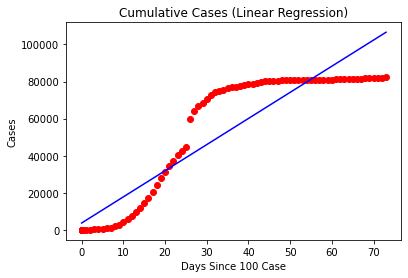

In [15]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Cumulative Cases (Linear Regression)')
plt.xlabel('Days Since 100 Case')
plt.ylabel('Cases')
plt.show()


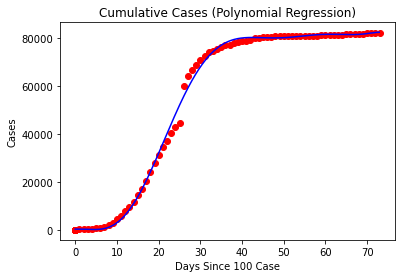

In [16]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Cumulative Cases (Polynomial Regression)')
plt.xlabel('Days Since 100 Case')
plt.ylabel('Cases')
plt.show()
